<a href="https://colab.research.google.com/github/ManikandanM13/BOA-DENSENET/blob/main/BOA_DEN_80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
import math
from math import sqrt
import tensorflow as tf
from tensorflow.keras import layers, models
import sklearn.metrics
from sklearn.svm import SVC

In [8]:
#Load the dataset
file_path = '/content/drive/MyDrive/ColonTumor (1).csv'
df = pd.read_csv(file_path)
#Display the first few rows to understand the structure
print(df.head())

    Patients  Gene 1  Gene 2  Gene 3  Gene 4  Gene 5  Gene 6  Gene 7  Gene 8  \
0  Patient 1  8590.0  5470.0  4260.0  4060.0  2000.0  5280.0  2170.0  2770.0   
1  Patient 2  9160.0  6720.0  4880.0  3720.0  2020.0  5570.0  3850.0  2790.0   
2  Patient 3  3830.0  6970.0  5370.0  4710.0  1170.0  1570.0  1330.0  1470.0   
3  Patient 4  6250.0  7820.0  5960.0  3980.0  2000.0  2130.0  1530.0  1710.0   
4  Patient 5  3230.0  3690.0  3400.0  3460.0  2180.0  2920.0  2070.0  2950.0   

   Gene 9  ...  Gene 1992  Gene 1993  Gene 1994  Gene 1995  Gene 1996  \
0  7530.0  ...       67.6     260.00      139.0       88.2       39.7   
1  7020.0  ...       92.2      96.30      151.0       82.2       85.0   
2  3300.0  ...       82.7      31.10      194.0       77.0      225.0   
3  3870.0  ...       41.7       5.93      183.0       74.5       67.7   
4  3300.0  ...       76.6     161.00       61.7       54.6      223.0   

   Gene 1997  Gene 1998  Gene 1999  Gene 2000    result  
0       67.8       75.

In [9]:
#Handle missing values, drop row if missing..
df = df.dropna()

In [10]:
# Handle categorical variables
label_encoder = LabelEncoder()
df['result'] = label_encoder.fit_transform(df['result'])

In [11]:
# Split the dataset into features and labels
X = df.drop('result', axis=1)
y = df['result']  # Labelsprint(df.info())# Assuming 'Patients' is the column with patient identifiers
X = X.drop('Patients', axis=1)#  Min-Max Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**BOA**

In [13]:
def butterfly_optimization(X_train, y_train, n_iterations):
    n_features = X_train.shape[1]
    n_population = 1936  # Number of butterflies
    n_global_search = int(0.4 * n_iterations)  # Percentage of iterations for global search
    n_local_search = n_iterations - n_global_search  # Percentage of iterations for local search
    switch_probability = 0.5  # Switching probability between global and local search

    # Initialize selected features randomly
    selected_features = np.random.choice(n_features, n_population, replace=True)
    best_solution = None
    best_fitness = 0

    for iteration in range(n_iterations):
        # Determine search phase
        if np.random.rand() < switch_probability:
            phase = "global"  # Global search
        else:
            phase = "local"  # Local search

        if phase == "global":
            # Perform global search (exploration)
            for i in range(n_population):
                # Randomly select a feature to update
                feature_to_update = np.random.randint(n_features)

                # Update the feature randomly
                selected_features[i] = feature_to_update
        else:
            # Perform local search (exploitation)
            for i in range(n_population):
                # Randomly select two butterflies other than the current one
                other_butterflies = np.random.choice(n_population, size=2, replace=False)
                butterfly_j, butterfly_k = other_butterflies

                # Update the feature based on BOA equations
                feature_to_update = int(0.5 * (selected_features[butterfly_j] - selected_features[butterfly_k]))

        # Evaluate the fitness of the selected features
        fitness = evaluate_fitness(X_train[:, selected_features], y_train)

        # Update the best solution if needed
        if fitness > best_fitness:
            best_solution = selected_features.copy()
            best_fitness = fitness

    # Return the best solution
    return best_solution


In [14]:
# Define a function to evaluate the fitness of selected features using SVM classifier
def evaluate_fitness(X_selected, y):

    # Initialize and train the SVM classifier
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    # Evaluate the trained model on the testing set
    accuracy = svm.score(X_test, y_test)

    return accuracy

In [15]:
# Apply BOA for feature selection
selected_features_indices = butterfly_optimization(X, y, n_iterations=100,)

# Select the features based on the indices
selected_features = X[:, selected_features_indices]

In [16]:
# Split the dataset into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)


In [17]:
print(selected_features.shape)

(62, 1936)


In [18]:
print(X_train.shape)

(49, 1936)


In [19]:
# Assuming nrows, ncols is the shape of the selected features
nrows, ncols = X_train.shape
size = int(np.sqrt(ncols))  # Assuming the images are square

# Normalize the data to the range [0, 255]
min_val = np.min(X_train)
max_val = np.max(X_train)
X_train_normalized = ((X_train - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Convert the normalized features to a 2D image, where each row is an image
image_data = X_train_normalized.reshape((nrows, size, size))

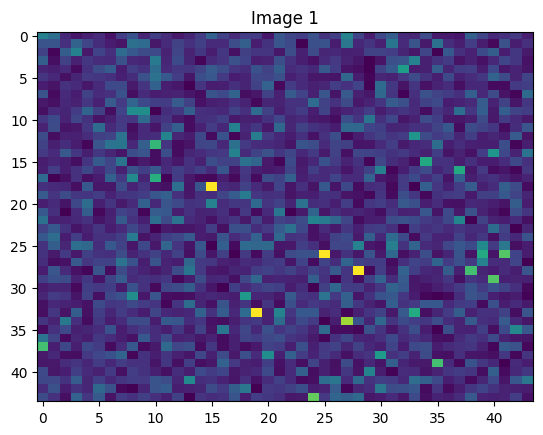

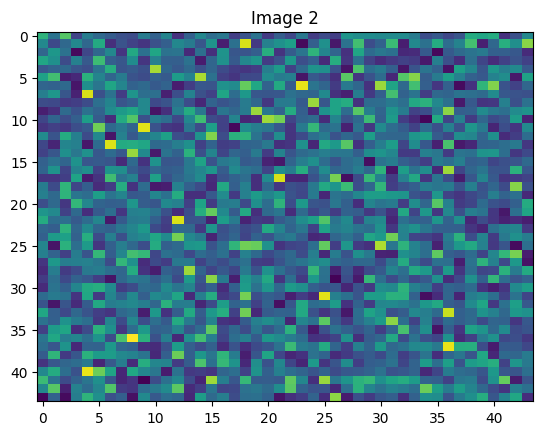

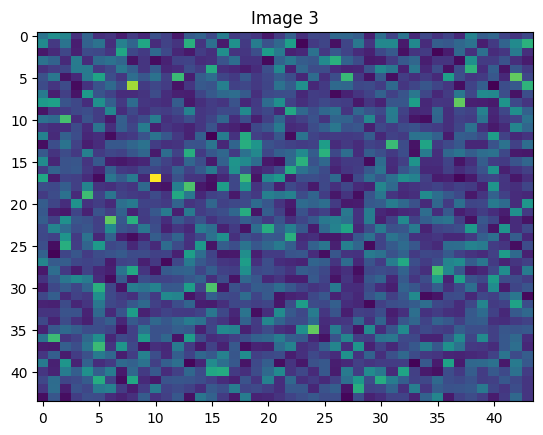

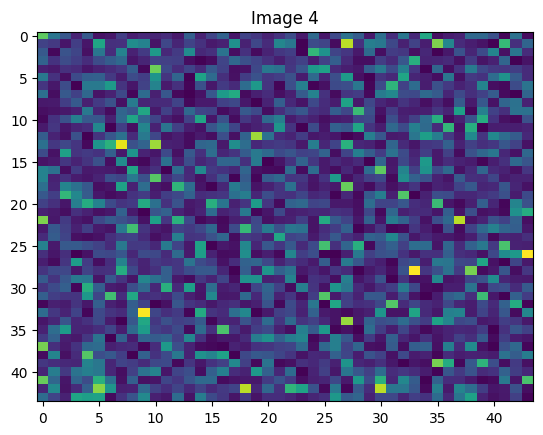

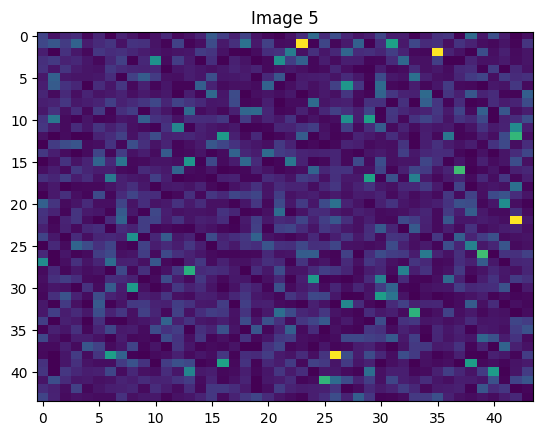

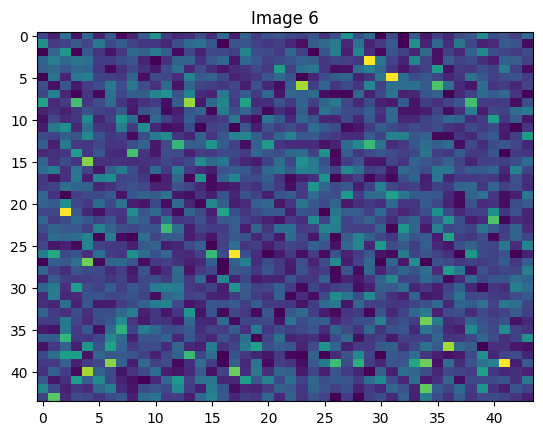

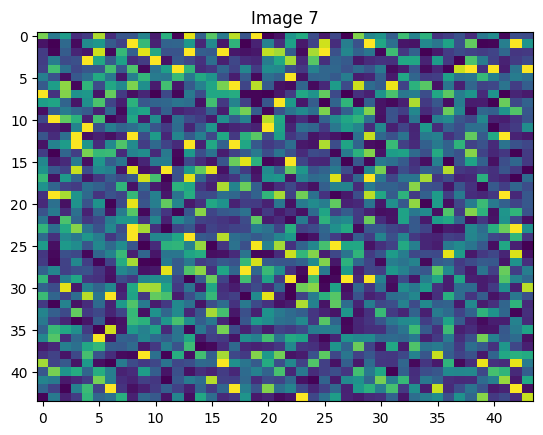

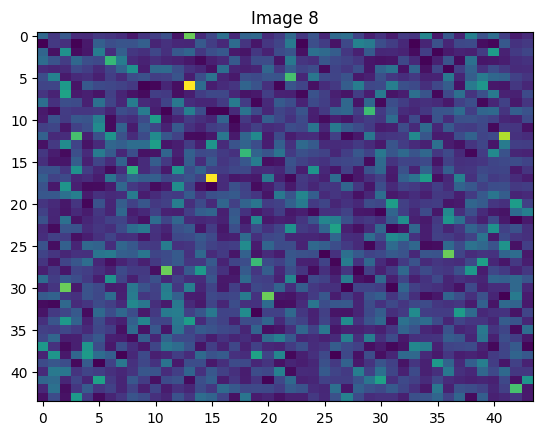

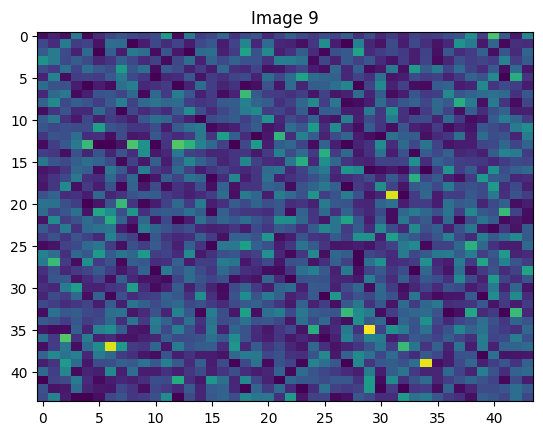

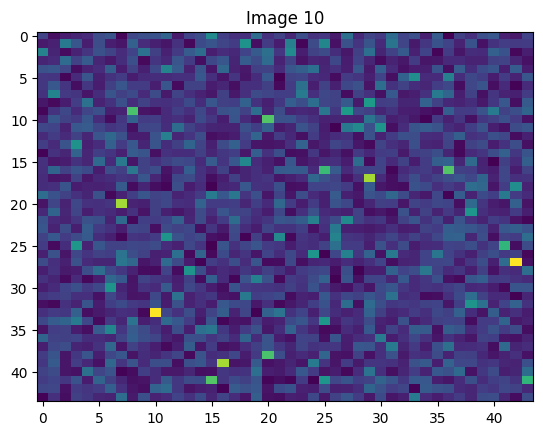

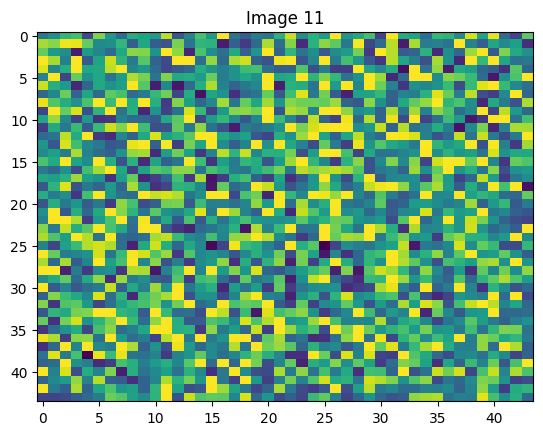

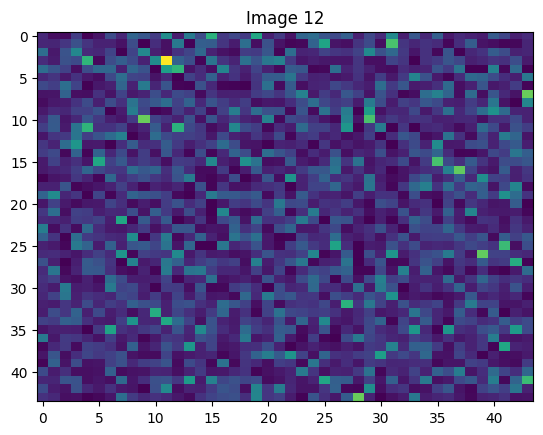

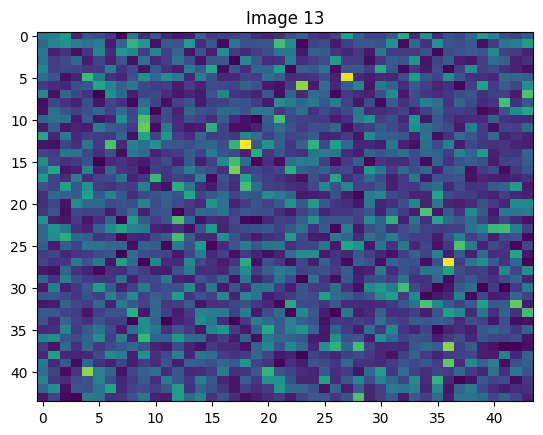

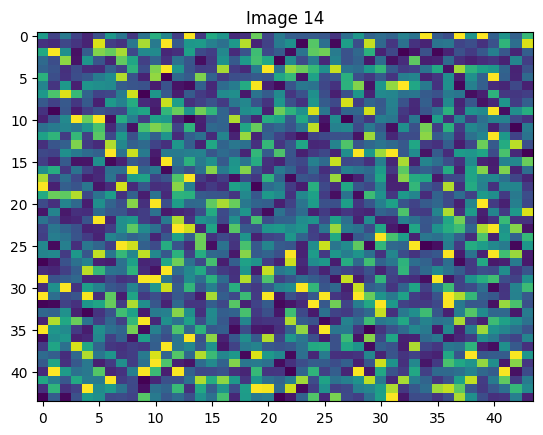

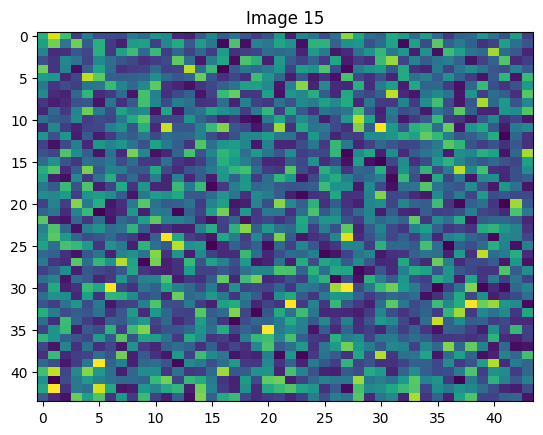

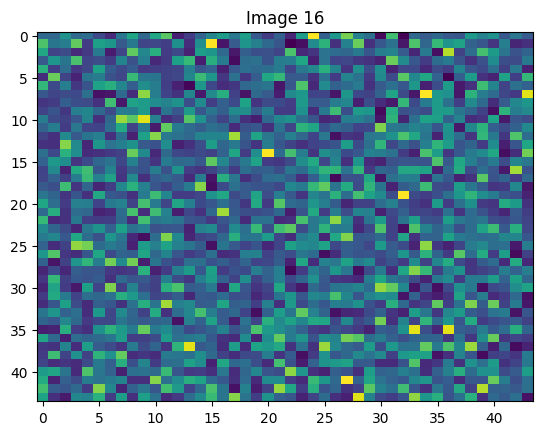

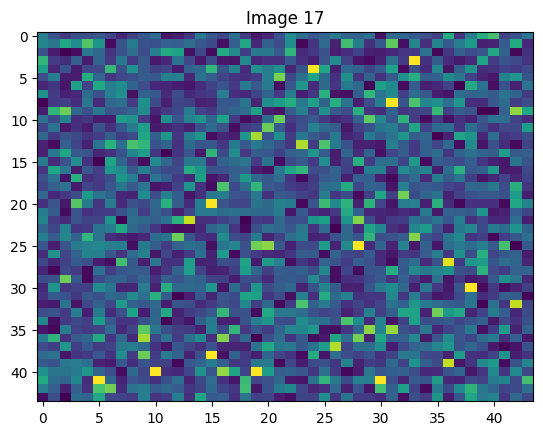

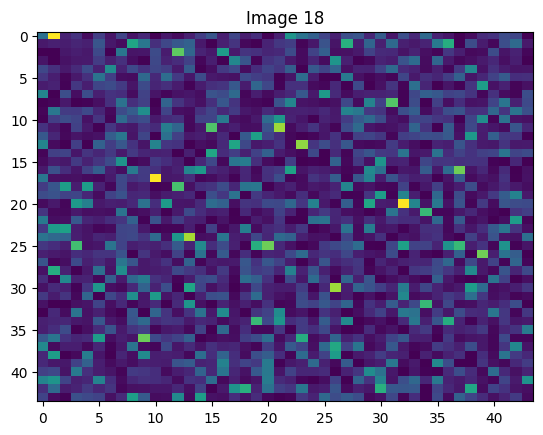

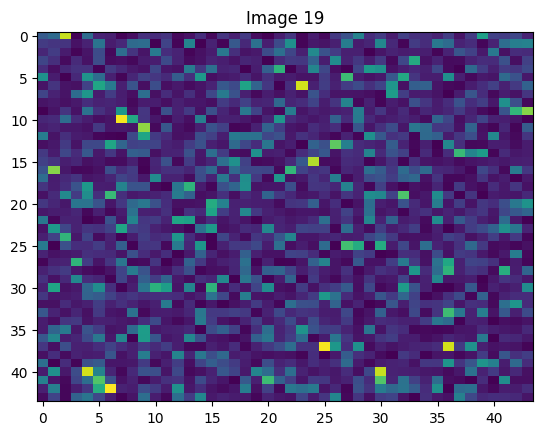

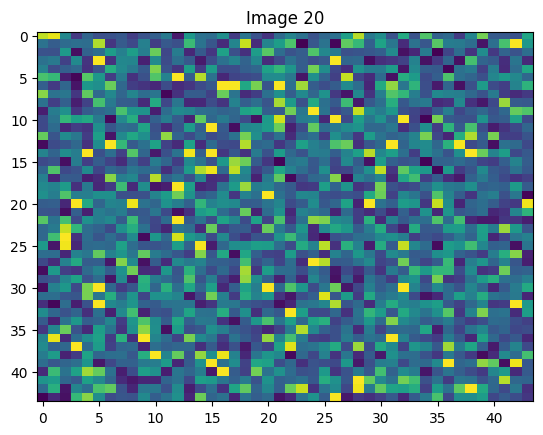

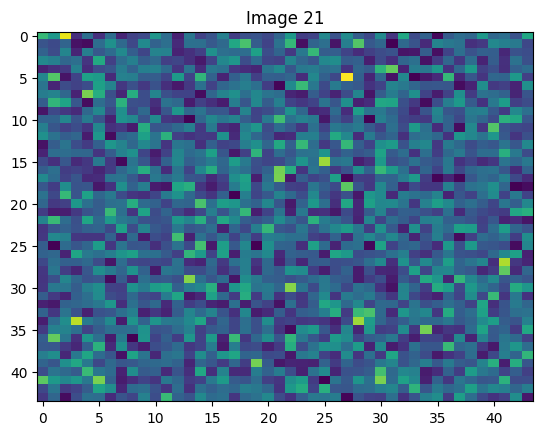

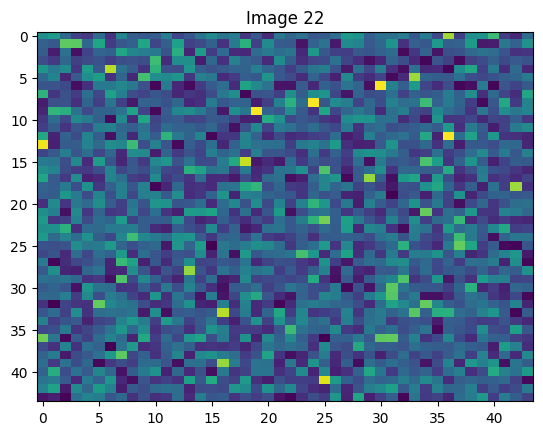

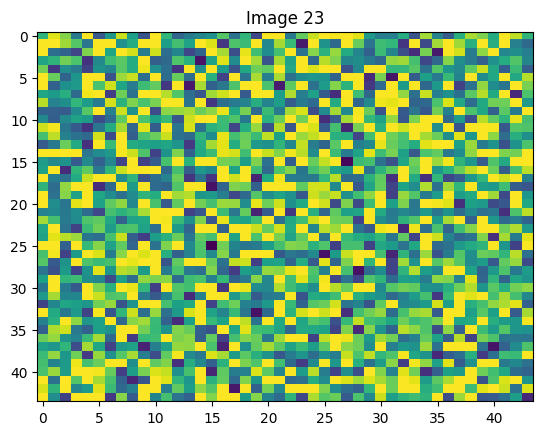

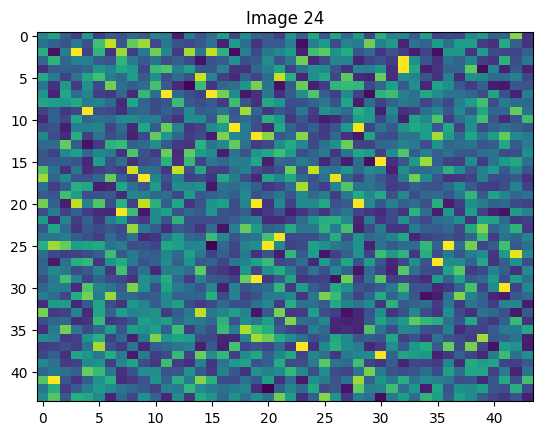

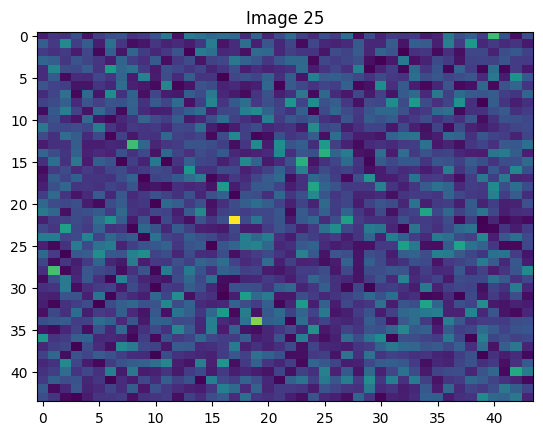

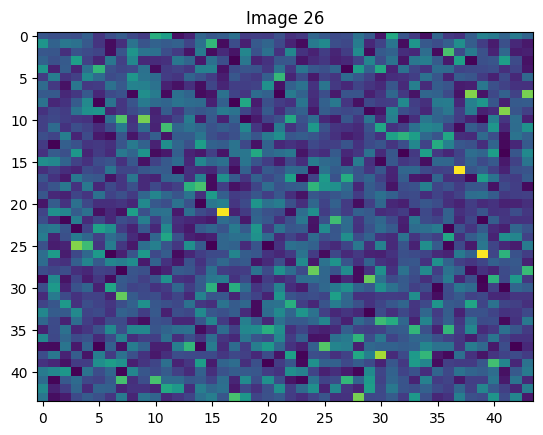

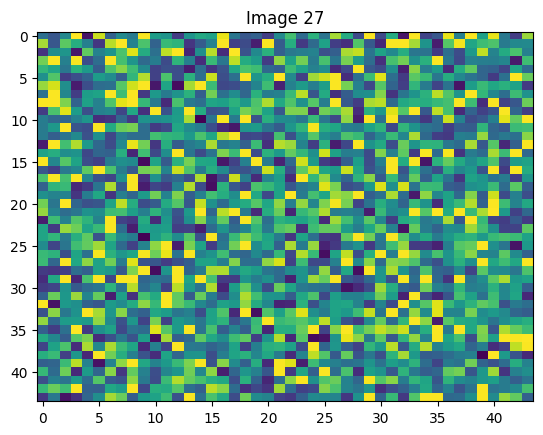

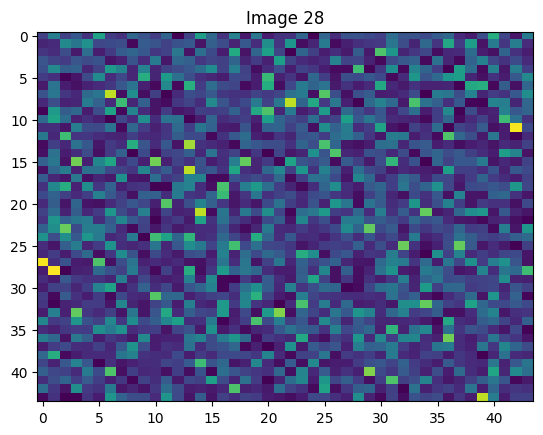

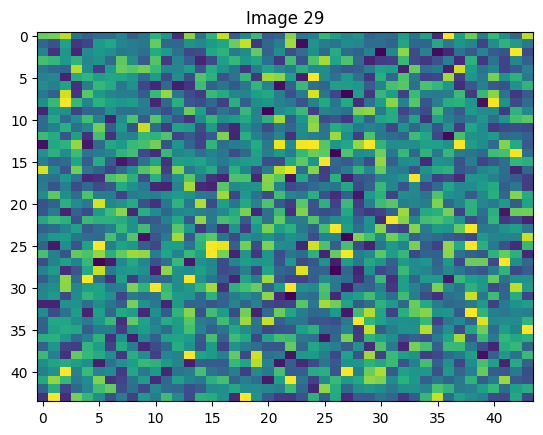

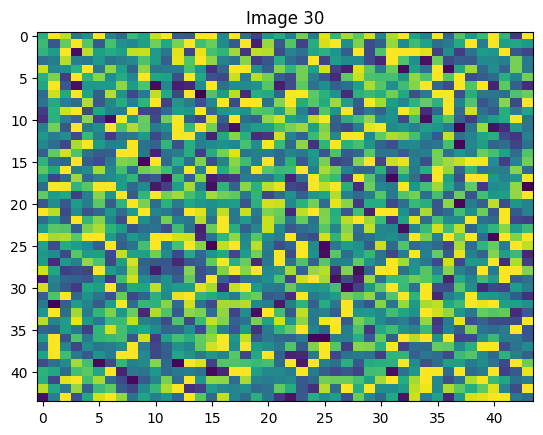

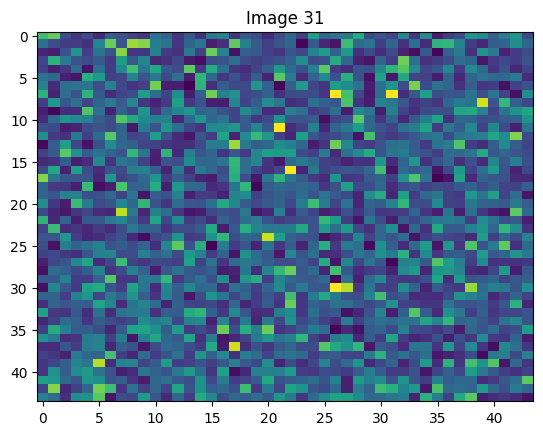

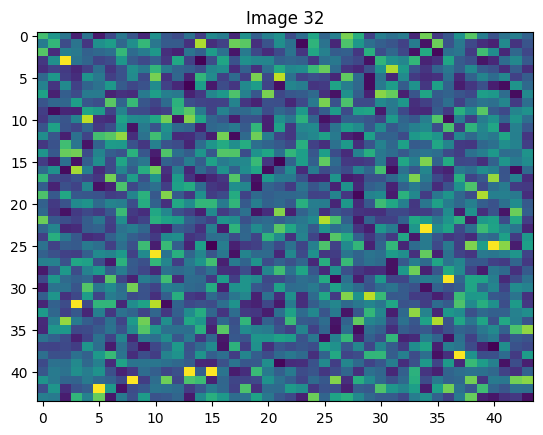

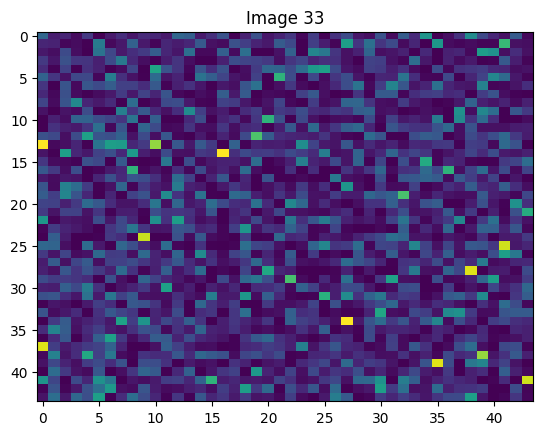

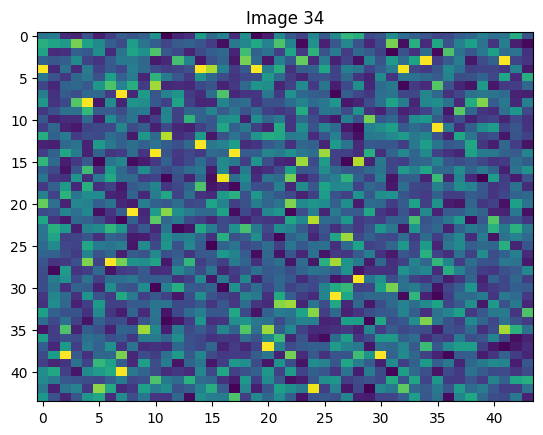

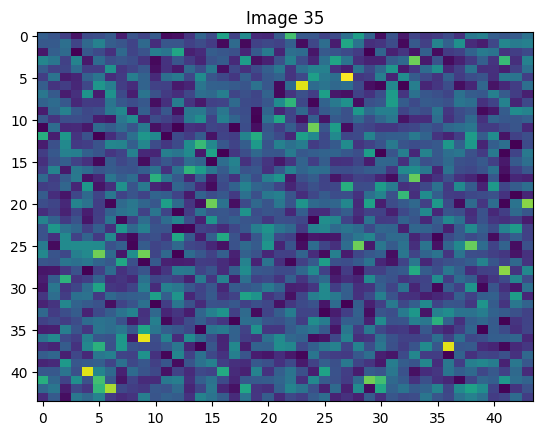

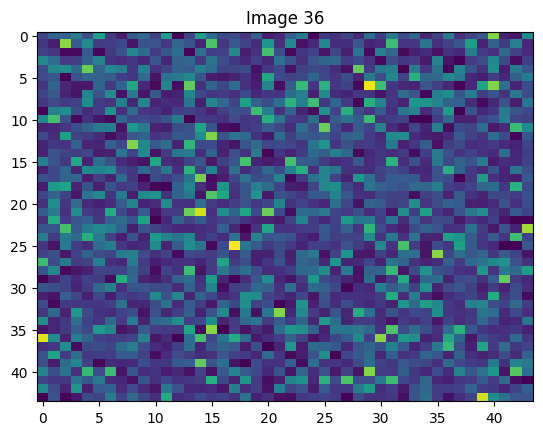

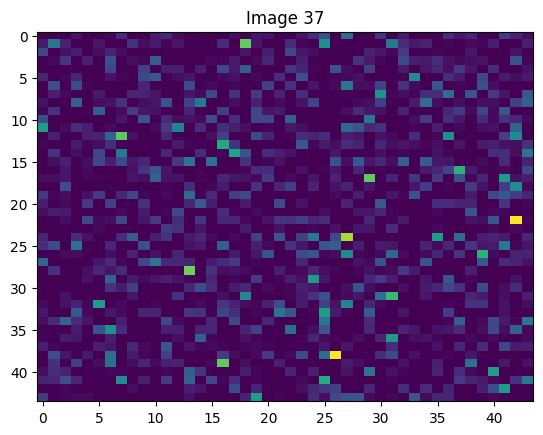

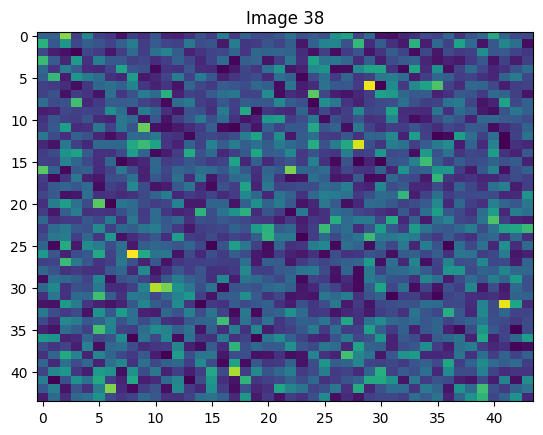

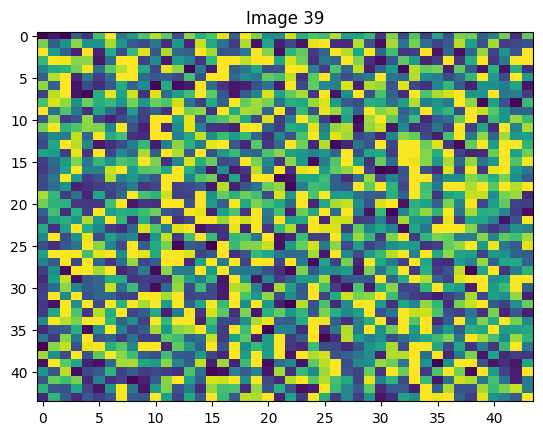

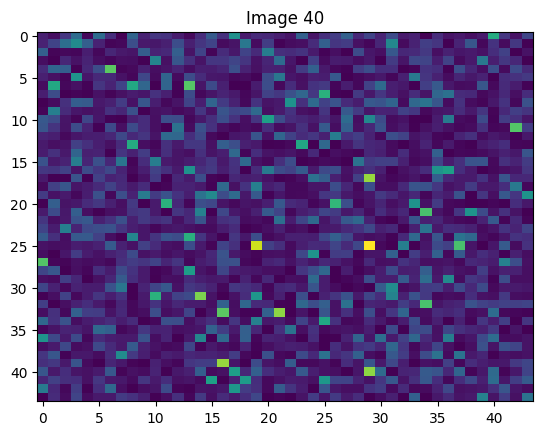

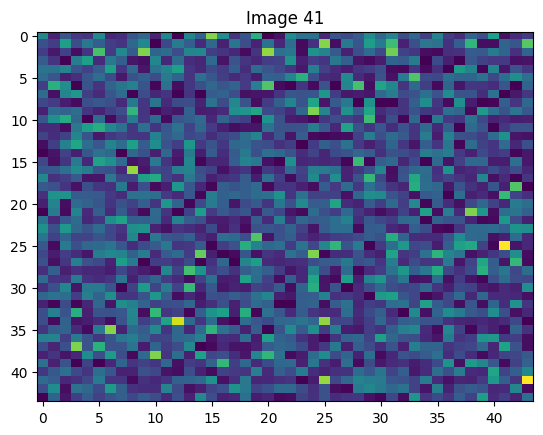

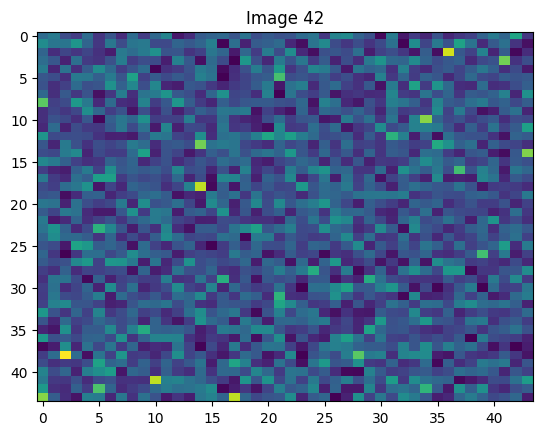

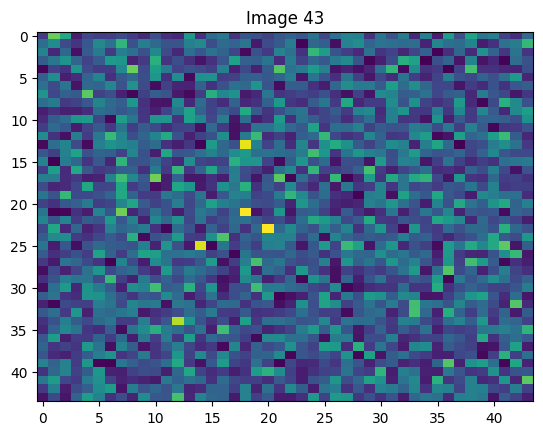

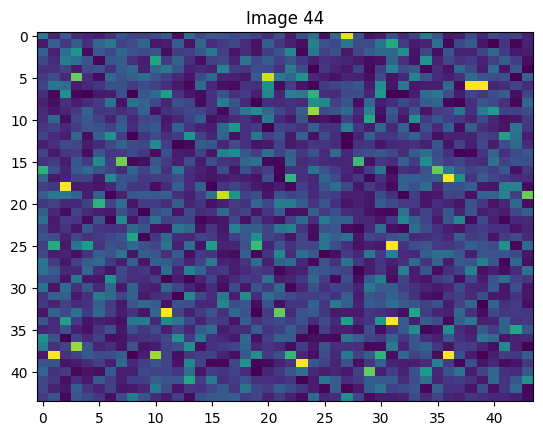

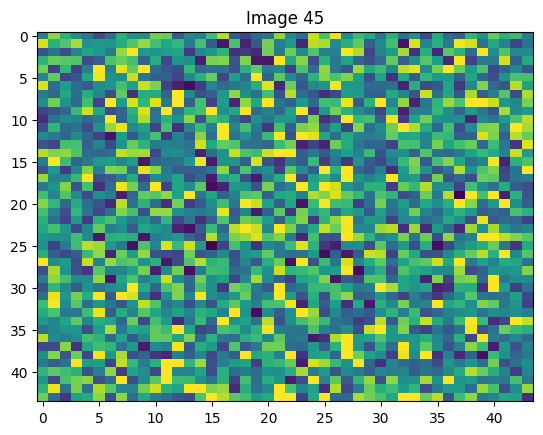

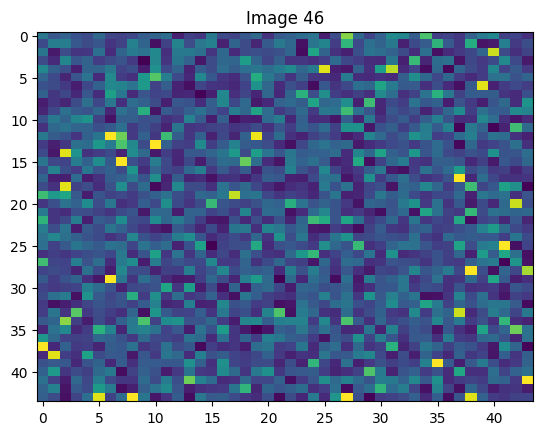

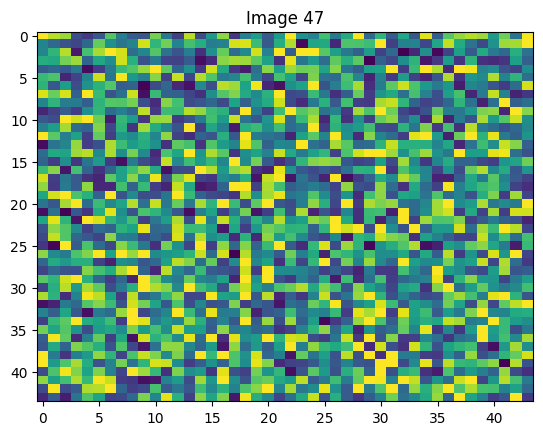

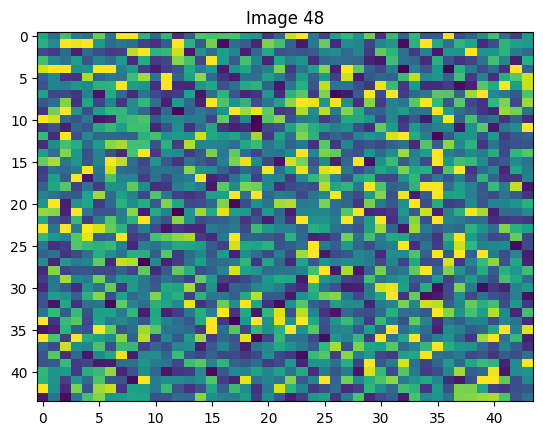

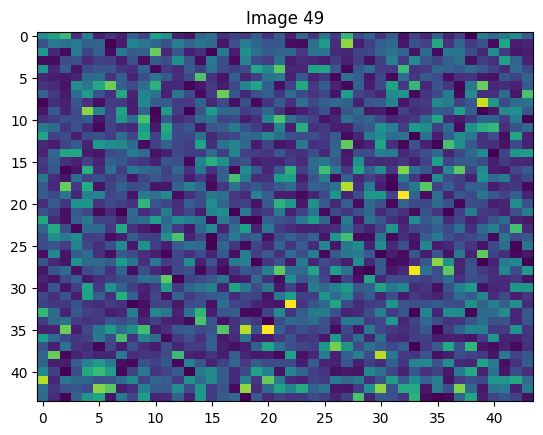

In [20]:
# Display all images
for i in range(nrows):
    plt.imshow(image_data[i], cmap='viridis', aspect='auto')
    plt.title(f"Image {i + 1}")
    plt.show()

**DENSENET**

In [21]:
from tensorflow.keras import regularizers, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
import sklearn.metrics
import numpy as np

def build_densenet_model(input_shape, l2_strength=0.0005):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))  # Flatten the 2D images

    model.add(layers.Dense(128, activation='leaky_relu', kernel_regularizer=regularizers.l2(l2_strength)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.2))  # Reduced dropout for small layers

    model.add(layers.Dense(256, activation='leaky_relu', kernel_regularizer=regularizers.l2(l2_strength)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))  # Kept 0.3 only for large layers

    model.add(layers.Dense(256, activation='leaky_relu', kernel_regularizer=regularizers.l2(l2_strength)))  # Reduced from 512 to 256
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(128, activation='leaky_relu', kernel_regularizer=regularizers.l2(l2_strength)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    return model

# Initialize the model
densenet_model = build_densenet_model(image_data.shape[1:])

# Use Exponential Decay for adaptive learning rate
lr_schedule = ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.96, staircase=True)
optimizer = Adam(learning_rate=lr_schedule)

densenet_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = densenet_model.fit(image_data, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred = densenet_model.predict(image_data)
y_pred_binary = np.round(y_pred)

# Compute evaluation metrics with matching variable names
densenet_precision = sklearn.metrics.precision_score(y_train, y_pred_binary)
densenet_recall = sklearn.metrics.recall_score(y_train, y_pred_binary)
densenet_f1 = sklearn.metrics.f1_score(y_train, y_pred_binary)
densenet_accuracy = sklearn.metrics.accuracy_score(y_train, y_pred_binary)

print(f'DenseNet Model - Precision: {densenet_precision:.4f}')
print(f'DenseNet Model - Recall: {densenet_recall:.4f}')
print(f'DenseNet Model - F1 Score: {densenet_f1:.4f}')
print(f'DenseNet Model - Accuracy: {densenet_accuracy:.4f}')

# Save the trained model
densenet_model.save('densenet_model.keras')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4615 - loss: 1.4997 - val_accuracy: 0.9000 - val_loss: 1.2671
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6923 - loss: 0.9952 - val_accuracy: 0.7000 - val_loss: 1.9948
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8462 - loss: 0.7855 - val_accuracy: 0.6000 - val_loss: 1.3382
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.8974 - loss: 0.7838 - val_accuracy: 1.0000 - val_loss: 0.5953
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8718 - loss: 0.6688 - val_accuracy: 0.8000 - val_loss: 0.8438
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9231 - loss: 0.6711 - val_accuracy: 0.6000 - val_loss: 1.5736
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9487 - loss: 0.6010 - val_accuracy: 0.5000 - val_loss: 2.0443
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8974 - loss: 0.7364 - val_accuracy: 0.5000 - val_loss: 2.

In [22]:
# Check class distribution in training data
import pandas as pd

# Assuming y_train contains the training labels
class_distribution = pd.Series(y_train).value_counts()
print("Class Distribution in Training Data:")
print(class_distribution)

Class Distribution in Training Data:
result
0    32
1    17
Name: count, dtype: int64


In [23]:
negative_indices = np.where(y_train == 0)[0]
print(negative_indices)

[ 1  2  6  7  8  9 10 12 13 16 18 19 20 21 22 24 25 26 27 28 29 32 34 35
 37 38 39 40 42 45 46 47]


Saving download (8).png to download (8).png


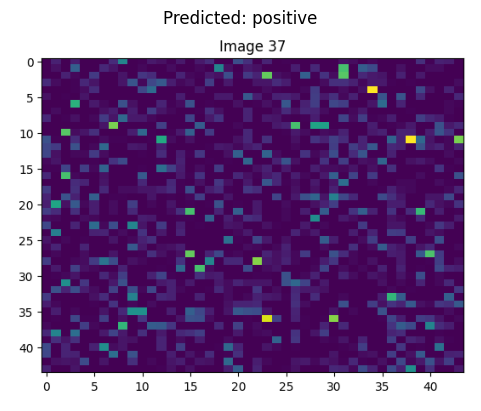

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Load the trained DenseNet model
model = load_model('densenet_model.keras')

# Handle categorical variables (if needed)
label_encoder = LabelEncoder()
label_encoder.fit(['negative', 'positive'])  # Ensure the labels are mapped correctly

# Function to preprocess the uploaded image
def preprocess_image(image, target_size=(44, 44)):
    """
    Preprocesses the uploaded image:
    - Resizes to the target size.
    - Converts to grayscale (if needed).
    - Normalizes pixel values to [0, 1].
    """
    # Resize the image
    image = image.resize(target_size)

    # Convert to grayscale (if needed)
    if image.mode != 'L':
        image = image.convert('L')

    # Convert to numpy array
    image = np.array(image)

    # Normalize pixel values to [0, 1]
    image = image.astype(np.float32) / 255.0

    # Add batch and channel dimensions
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image

# Function to make predictions
def predict(image):
    """
    Runs inference on the preprocessed image.
    Returns predicted class (0 or 1).
    """
    prediction = model.predict(image, verbose=0)
    predicted_class = int(prediction[0][0] > 0.5)  # Convert probability to binary class
    return predicted_class

# Upload an image
uploaded = files.upload()

# Process the uploaded image
for file_name in uploaded.keys():
    # Load the image
    image = Image.open(file_name)

    # Preprocess the image
    preprocessed_image = preprocess_image(image, target_size=(44, 44))

    # Make a prediction
    predicted_class = predict(preprocessed_image)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    # Display the image and prediction
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'Predicted: {predicted_label}')
    plt.show()

**CNN**

In [ ]:
from tensorflow.keras import layers, models
import numpy as np
import sklearn.metrics

# Reshape image_data to include a single channel (grayscale)
image_data = image_data.reshape(image_data.shape[0], image_data.shape[1], image_data.shape[2], 1)

def build_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

    return model

# Initialize and compile the model
cnn_model = build_cnn_model(image_data.shape[1:])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(image_data, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the CNN model
y_pred = cnn_model.predict(image_data)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions

# Compute evaluation metrics with matching variable names
cnn_precision = sklearn.metrics.precision_score(y_train, y_pred_binary)
cnn_recall = sklearn.metrics.recall_score(y_train, y_pred_binary)
cnn_f1 = sklearn.metrics.f1_score(y_train, y_pred_binary)
cnn_accuracy = sklearn.metrics.accuracy_score(y_train, y_pred_binary)

print(f'CNN Model - Precision: {cnn_precision:.4f}')
print(f'CNN Model - Recall: {cnn_recall:.4f}')
print(f'CNN Model - F1 Score: {cnn_f1:.4f}')
print(f'CNN Model - Accuracy: {cnn_accuracy:.4f}')

# Save the trained CNN model
cnn_model.save('cnn_model.keras')


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step - accuracy: 0.6290 - loss: 4.6913 - val_accuracy: 0.4000 - val_loss: 18.9281
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.3264 - loss: 18.1194 - val_accuracy: 0.6000 - val_loss: 3.6012
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6736 - loss: 2.6243 - val_accuracy: 0.6000 - val_loss: 1.5398
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5673 - loss: 1.2066 - val_accuracy: 0.6000 - val_loss: 0.7465
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8558 - loss: 0.5345 - val_accuracy: 0.6000 - val_loss: 1.8128
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6736 - loss: 1.0217 - val_accuracy: 0.5000 - val_loss: 0.9860
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8900 - loss: 0.3531 - val_accuracy: 0.4000 - val_loss: 1.9201
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.3539 - loss: 1.5561 - val_accuracy: 0.5000 - val_loss: 0.9069
Epoc

**DNN**

In [ ]:
from tensorflow.keras import layers, models
import numpy as np
import sklearn.metrics

def build_dnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Flatten(input_shape=input_shape))  # Flatten input features
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))  # Dropout to prevent overfitting

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

    return model

# Initialize and compile the DNN model
dnn_model = build_dnn_model(image_data.shape[1:])
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the DNN model
history = dnn_model.fit(image_data, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the DNN model
y_pred = dnn_model.predict(image_data)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions

# Compute evaluation metrics with matching variable names
dnn_precision = sklearn.metrics.precision_score(y_train, y_pred_binary)
dnn_recall = sklearn.metrics.recall_score(y_train, y_pred_binary)
dnn_f1 = sklearn.metrics.f1_score(y_train, y_pred_binary)
dnn_accuracy = sklearn.metrics.accuracy_score(y_train, y_pred_binary)

print(f'DNN Model - Precision: {dnn_precision:.4f}')
print(f'DNN Model - Recall: {dnn_recall:.4f}')
print(f'DNN Model - F1 Score: {dnn_f1:.4f}')
print(f'DNN Model - Accuracy: {dnn_accuracy:.4f}')

# Save the trained DNN model
dnn_model.save('dnn_model.keras')


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 0.5152 - loss: 22.7809 - val_accuracy: 0.6000 - val_loss: 99.4136
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6736 - loss: 63.7543 - val_accuracy: 0.4000 - val_loss: 46.1599
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.4364 - loss: 51.6468 - val_accuracy: 0.6000 - val_loss: 13.2481
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5911 - loss: 20.6678 - val_accuracy: 0.6000 - val_loss: 53.7670
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6632 - loss: 35.4517 - val_accuracy: 0.6000 - val_loss: 40.1016
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7182 - loss: 35.9271 - val_accuracy: 0.7000 - val_loss: 6.3236
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7390 - loss: 14.6706 - val_accuracy: 0.4000 - val_loss: 37.4853
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3814 - loss: 49.8275 - val_accuracy: 0.5000 - val_lo

**COMPARISON GRAPH BETWEEN DENSENET, CNN AND DNN**

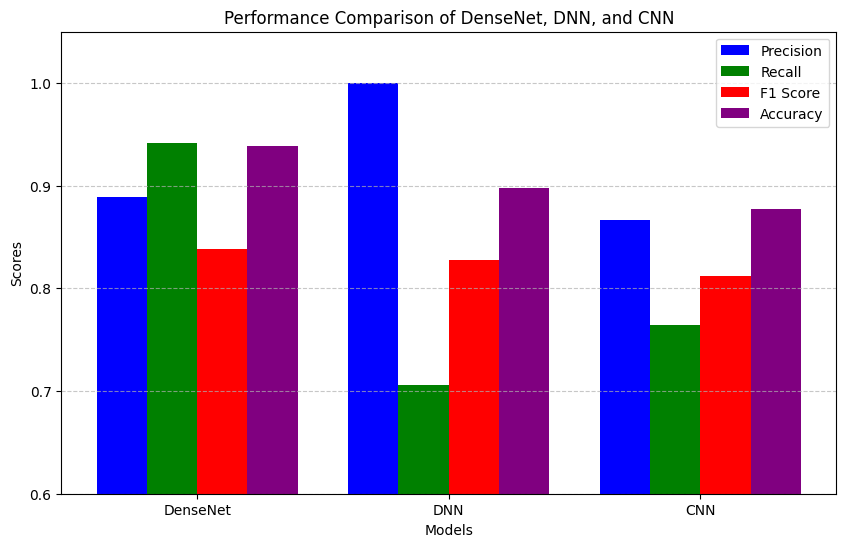

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure that metrics are extracted from lists and converted to scalars
densenet_precision = float(densenet_precision[0]) if isinstance(densenet_precision, list) else float(densenet_precision)
densenet_recall = float(densenet_recall[0]) if isinstance(densenet_recall, list) else float(densenet_recall)
densenet_f1 = float(densenet_f1[0]) if isinstance(densenet_f1, list) else float(densenet_f1)
densenet_accuracy = float(densenet_accuracy[0]) if isinstance(densenet_accuracy, list) else float(densenet_accuracy)

dnn_precision = float(dnn_precision[0]) if isinstance(dnn_precision, list) else float(dnn_precision)
dnn_recall = float(dnn_recall[0]) if isinstance(dnn_recall, list) else float(dnn_recall)
dnn_f1 = float(dnn_f1[0]) if isinstance(dnn_f1, list) else float(dnn_f1)
dnn_accuracy = float(dnn_accuracy[0]) if isinstance(dnn_accuracy, list) else float(dnn_accuracy)

cnn_precision = float(cnn_precision[0]) if isinstance(cnn_precision, list) else float(cnn_precision)
cnn_recall = float(cnn_recall[0]) if isinstance(cnn_recall, list) else float(cnn_recall)
cnn_f1 = float(cnn_f1[0]) if isinstance(cnn_f1, list) else float(cnn_f1)
cnn_accuracy = float(cnn_accuracy[0]) if isinstance(cnn_accuracy, list) else float(cnn_accuracy)

# Model names
models = ['DenseNet', 'DNN', 'CNN']

# Performance metrics
precision_values = [densenet_precision, dnn_precision, cnn_precision]
recall_values = [densenet_recall, dnn_recall, cnn_recall]
f1_score_values = [densenet_f1, dnn_f1, cnn_f1]
accuracy_values = [densenet_accuracy, dnn_accuracy, cnn_accuracy]

# Bar width
bar_width = 0.2
index = np.arange(len(models))

# Create bar chart
plt.figure(figsize=(10, 6))

plt.bar(index, precision_values, bar_width, label='Precision', color='blue')
plt.bar(index + bar_width, recall_values, bar_width, label='Recall', color='green')
plt.bar(index + 2 * bar_width, f1_score_values, bar_width, label='F1 Score', color='red')
plt.bar(index + 3 * bar_width, accuracy_values, bar_width, label='Accuracy', color='purple')

# Labels & Title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison of DenseNet, DNN, and CNN')
plt.xticks(index + 1.5 * bar_width, models)
plt.ylim(0.6, 1.05)  # Ensure all bars fit in range

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
